In [1]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.names

--2023-02-23 12:30:16--  https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 30286 (30K) [application/x-httpd-php]
Saving to: 'auto-mpg.data.1'

     0K .......... .......... .........                       100% 93.6K=0.3s

2023-02-23 12:30:17 (93.6 KB/s) - 'auto-mpg.data.1' saved [30286/30286]

--2023-02-23 12:30:17--  https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.names
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1660 (1.6K) [application/x-httpd-php]
Saving to: 'auto-mpg.names.1'

     0K .                                                     100% 4

![](images/100dollars_regression_problem.png)

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
file = open('auto-mpg.data', 'r')
fileread = file.readlines()


In [4]:
data_of_data = []
for item in fileread:
    data = []
    item = item.replace("\n", "")
    item = item.replace("\t", " ")
    item = item.split(' ')
    for subitem in item:
        if subitem != "":
            data.append(subitem)
    data_of_data.append(data)

In [5]:
new_data_of_data = []
for item in data_of_data:
    new_data = item[:8]
    item = ' '.join(subitem.replace('"', '') for subitem in item[8:])
    new_data.append(item)
    new_data_of_data.append(new_data)    

In [6]:
print(new_data_of_data)

[['18.0', '8', '307.0', '130.0', '3504.', '12.0', '70', '1', 'chevrolet chevelle malibu'], ['15.0', '8', '350.0', '165.0', '3693.', '11.5', '70', '1', 'buick skylark 320'], ['18.0', '8', '318.0', '150.0', '3436.', '11.0', '70', '1', 'plymouth satellite'], ['16.0', '8', '304.0', '150.0', '3433.', '12.0', '70', '1', 'amc rebel sst'], ['17.0', '8', '302.0', '140.0', '3449.', '10.5', '70', '1', 'ford torino'], ['15.0', '8', '429.0', '198.0', '4341.', '10.0', '70', '1', 'ford galaxie 500'], ['14.0', '8', '454.0', '220.0', '4354.', '9.0', '70', '1', 'chevrolet impala'], ['14.0', '8', '440.0', '215.0', '4312.', '8.5', '70', '1', 'plymouth fury iii'], ['14.0', '8', '455.0', '225.0', '4425.', '10.0', '70', '1', 'pontiac catalina'], ['15.0', '8', '390.0', '190.0', '3850.', '8.5', '70', '1', 'amc ambassador dpl'], ['15.0', '8', '383.0', '170.0', '3563.', '10.0', '70', '1', 'dodge challenger se'], ['14.0', '8', '340.0', '160.0', '3609.', '8.0', '70', '1', "plymouth 'cuda 340"], ['15.0', '8', '400.

In [17]:
file = open('auto-mpg.names', 'r')
fileread = file.read()
# fileread = fileread.split('\n')

In [20]:
column_values = fileread.split('Attribute Information:')[1]
column_values = column_values.split('\n')
column_values

['',
 '',
 '    1. mpg:           continuous',
 '    2. cylinders:     multi-valued discrete',
 '    3. displacement:  continuous',
 '    4. horsepower:    continuous',
 '    5. weight:        continuous',
 '    6. acceleration:  continuous',
 '    7. model year:    multi-valued discrete',
 '    8. origin:        multi-valued discrete',
 '    9. car name:      string (unique for each instance)',
 '',
 '8. Missing Attribute Values:  horsepower has 6 missing values',
 '',
 '']

In [25]:
columns = []
for col in column_values[2:-4]:
    strip_col = col.strip()
    split_col = strip_col.split(':')[0].split('.')[1].strip()   
    columns.append(split_col)


In [26]:
print(columns)

['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin', 'car name']


In [27]:
cars_df = pd.DataFrame(data = new_data_of_data, columns = columns)
cars_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.,10.5,70,1,ford torino


In [28]:
cars_df.to_csv('csv_data/cars_df.csv', index = False)

In [30]:
cars_df.columns = ["mpg", "cyl", "disp", "hp", "wt",
                 "acc", "year", "org", "name"]

In [31]:
cars_df.head()

,mpg,cyl,disp,hp,wt,acc,year,org,name
0,18.0,8,307.0,130.0,3504.,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.,10.5,70,1,ford torino


In [32]:
cars_df.isnull().sum()

mpg     0
cyl     0
disp    0
hp      0
wt      0
acc     0
year    0
org     0
name    0
dtype: int64

In [36]:
cars_df.loc[cars_df['hp'] == "?"].shape

(6, 9)

In [37]:
cars_df.shape

(398, 9)

In [46]:
clean_cars_df = cars_df.loc[~(cars_df['hp'] == "?")]

In [47]:
clean_cars_df

,mpg,cyl,disp,hp,wt,acc,year,org,name
0,18.0,8,307.0,130.0,3504.,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.,15.6,82,1,ford mustang gl
394,44.0,4,97.00,52.00,2130.,24.6,82,2,vw pickup
395,32.0,4,135.0,84.00,2295.,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.00,2625.,18.6,82,1,ford ranger


### Boxplot for disp column

In [48]:
clean_cars_df['disp']

0      307.0
1      350.0
2      318.0
3      304.0
4      302.0
       ...  
393    140.0
394    97.00
395    135.0
396    120.0
397    119.0
Name: disp, Length: 392, dtype: object

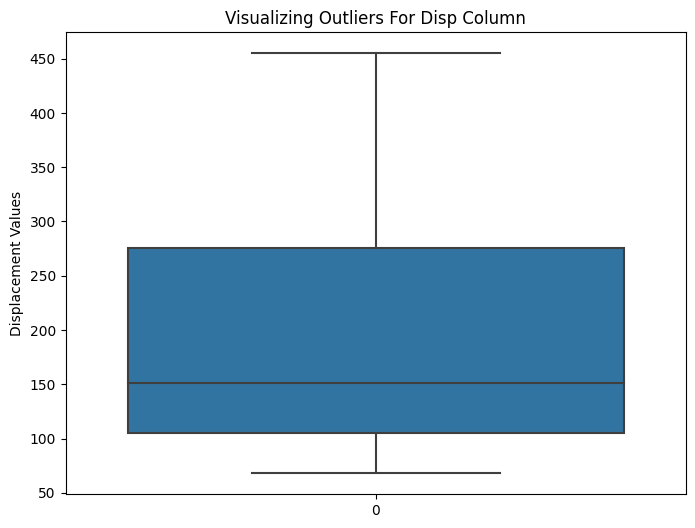

In [51]:
plt.figure(figsize = (8, 6))
sns.boxplot(clean_cars_df['disp'])
plt.title("Visualizing Outliers For Disp Column")
plt.ylabel("Displacement Values")
plt.show()

### Boxplot For hp column

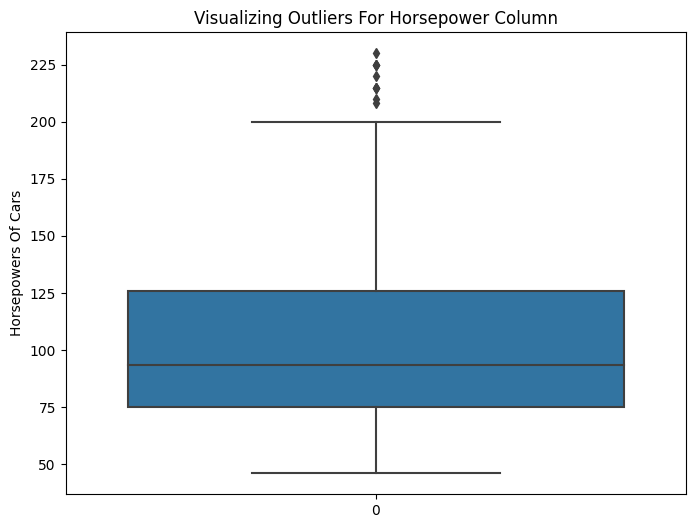

In [52]:
plt.figure(figsize = (8, 6))
sns.boxplot(clean_cars_df['hp'])
plt.title("Visualizing Outliers For Horsepower Column")
plt.ylabel("Horsepowers Of Cars")
plt.show()

### Boxplot For Weight columns

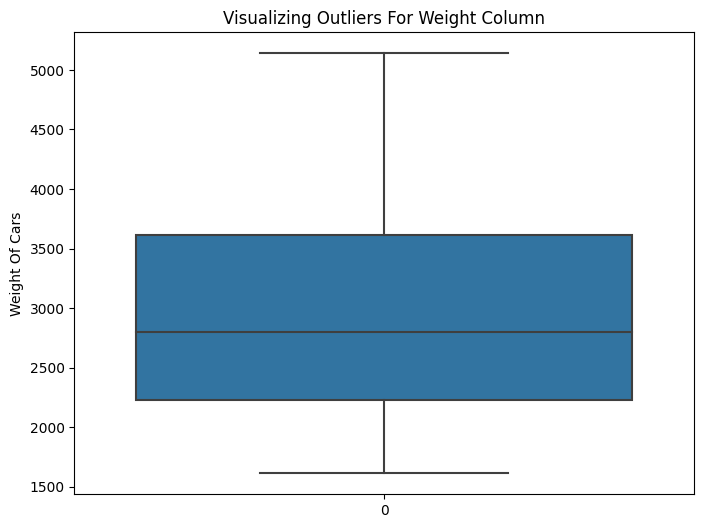

In [53]:
plt.figure(figsize = (8, 6))
sns.boxplot(clean_cars_df['wt'])
plt.title("Visualizing Outliers For Weight Column")
plt.ylabel("Weight Of Cars")
plt.show()

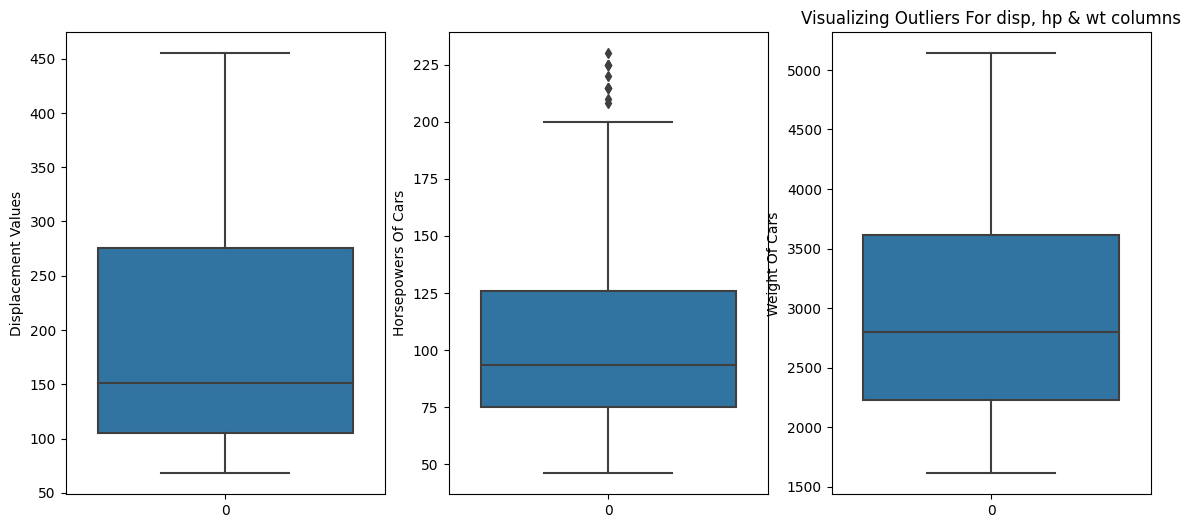

In [59]:
plt.figure(figsize = (14, 6))
plt.subplot(1, 3, 1)
sns.boxplot(clean_cars_df['disp'])
plt.ylabel("Displacement Values")

plt.subplot(1, 3, 2)
sns.boxplot(clean_cars_df['hp'])
plt.ylabel("Horsepowers Of Cars")

plt.subplot(1, 3, 3)
sns.boxplot(clean_cars_df['wt'])
plt.ylabel("Weight Of Cars")

plt.title('Visualizing Outliers For disp, hp & wt columns')

plt.show()